WEEK 12:
Build models using different Ensemble techniques.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load data
df = pd.read_csv('heart.csv')

# Split the data
X = df.drop(['target'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier
Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [16]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred_gb = gb_clf.predict(X_test)
print("Gradient Boosting Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Classifier
Accuracy: 0.9317073170731708
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       102
           1       0.92      0.95      0.93       103

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205



In [17]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Base models
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)),
    ('svc', SVC(kernel='linear', probability=True))
]

# Stacking Classifier
stack_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred_stack = stack_clf.predict(X_test)
print("Stacking Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_stack))
print(classification_report(y_test, y_pred_stack))

Stacking Classifier
Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [18]:
# Averaging Predictions
avg_pred = (rf_clf.predict_proba(X_test)[:, 1] + gb_clf.predict_proba(X_test)[:, 1] + stack_clf.predict_proba(X_test)[:, 1]) / 3
avg_pred_labels = np.where(avg_pred > 0.5, 1, 0)

print("Averaging Method")
print("Accuracy:", accuracy_score(y_test, avg_pred_labels))
print(classification_report(y_test, avg_pred_labels))

Averaging Method
Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [19]:
# Max Voting
preds = np.array([rf_clf.predict(X_test), gb_clf.predict(X_test), stack_clf.predict(X_test)])
max_vote_pred = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=preds)

print("Max Voting Method")
print("Accuracy:", accuracy_score(y_test, max_vote_pred))
print(classification_report(y_test, max_vote_pred))

Max Voting Method
Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



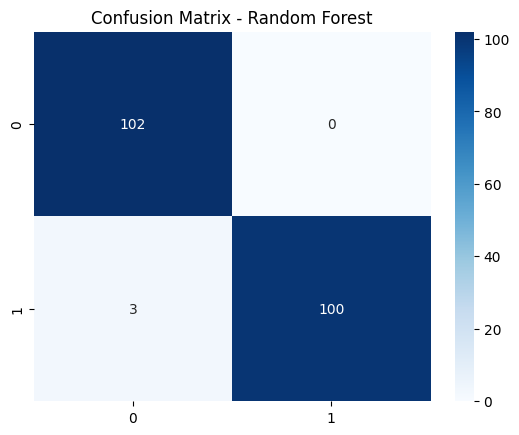

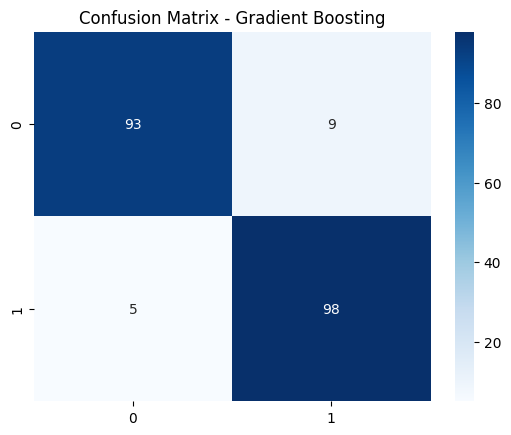

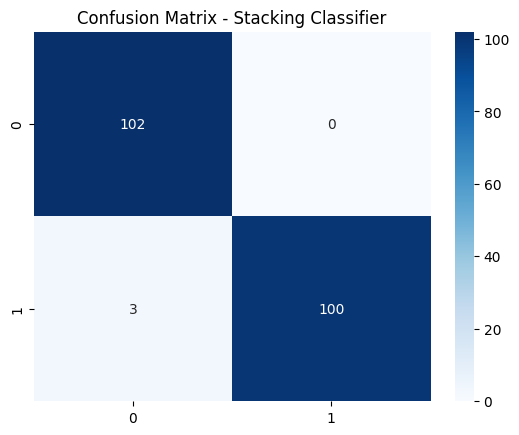

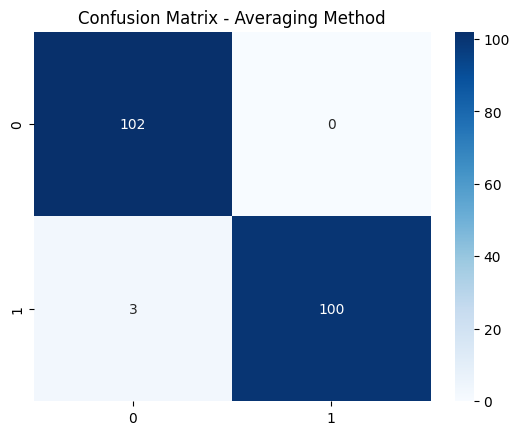

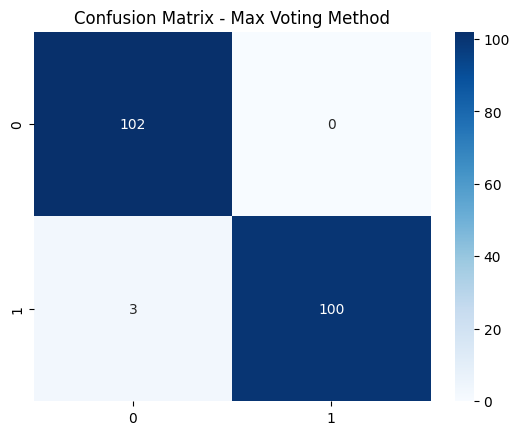

In [20]:
# Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Confusion Matrix for Gradient Boosting
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

# Confusion Matrix for Stacking Classifier
conf_matrix_stack = confusion_matrix(y_test, y_pred_stack)
sns.heatmap(conf_matrix_stack, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Stacking Classifier')
plt.show()

# Confusion Matrix for Averaging Method
conf_matrix_avg = confusion_matrix(y_test, avg_pred_labels)
sns.heatmap(conf_matrix_avg, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Averaging Method')
plt.show()

# Confusion Matrix for Max Voting Method
conf_matrix_vote = confusion_matrix(y_test, max_vote_pred)
sns.heatmap(conf_matrix_vote, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Max Voting Method')
plt.show()